### Importação de Módulos e arquivos

In [7]:
import pandas as pd

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

#Retirar colunas Estado Civil e Cargo da tabela CadastroFuncionarios.csv
funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'], axis=1)

display(funcionarios_df)
display(clientes_df)
display(servicos_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [2]:
#Unindo as tabelas (merge)

servicos_df = servicos_df.merge(funcionarios_df, on='ID Funcionário')
servicos_df = servicos_df.merge(clientes_df, on='ID Cliente')
display(servicos_df)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Cliente,Valor Contrato Mensal
0,OS0001,67,1,14,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Financeiro,Teixeira Gonçalves,540
1,OS0058,67,78,6,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Financeiro,Eduardo Resende,1710
2,OS0092,67,125,8,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Financeiro,De Machado,1710
3,OS0128,67,175,6,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Financeiro,Vilhena Rossini,945
4,OS0002,17,2,12,Pedro Carrera,15718,7859.0,3143.6,176,628.32,Logística,Souza Santos,1260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,OS0224,25,304,14,Livia Mello,23612,11806.0,4722.4,264,561.12,Administrativo,Da Oliveira,810
233,OS0228,79,308,10,Larissa Coutinho Beltrao,17207,8603.5,3441.4,198,688.80,Operações,Manoel Rimes,1935
234,OS0229,99,309,8,Rafael Viana Santos,18763,9381.5,3752.6,154,692.16,Administrativo,Arlindo Amorim,3735
235,OS0230,14,310,12,Jessica Oliveira Lima,2182,1091.0,436.4,220,604.80,Financeiro,Kenji Espinha,3735


### 1- Valor Total da Folha Salarial

In [8]:
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print('O valor total da folha salarial mensal é de R${:,}'.format(funcionarios_df['Salario Total'].sum()))

O valor total da folha salarial mensal é de R$2,717,493.22


### 2- Faturamento Total da empresa

In [9]:
faturamentos_df = servicos_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df, on='ID Cliente')
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
print('O faturamento total da empresa é de R${:,}'.format(faturamentos_df["Faturamento Total"].sum()))

O faturamento total da empresa é de R$5,519,160


### 3- (%) de funcionários que já fechou algum contrato

In [10]:
qtde_funcionario_fecharam_contrato = len(servicos_df['ID Funcionário'].unique())
qtde_funcionario_total = len(funcionarios_df['ID Funcionário'])

print('Percentual de funcionários que fecharam contrato {:.2%}'.format(qtde_funcionario_fecharam_contrato / qtde_funcionario_total))


Percentual de funcionários que fecharam contrato 86.84%


### 4- Total de contratos que cada área da empresa já fechou

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Area
0,OS0001,67,1,14,Financeiro
1,OS0058,67,78,6,Financeiro
2,OS0092,67,125,8,Financeiro
3,OS0128,67,175,6,Financeiro
4,OS0002,17,2,12,Logística
...,...,...,...,...,...
232,OS0224,25,304,14,Administrativo
233,OS0228,79,308,10,Operações
234,OS0229,99,309,8,Administrativo
235,OS0230,14,310,12,Financeiro


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

<AxesSubplot:>

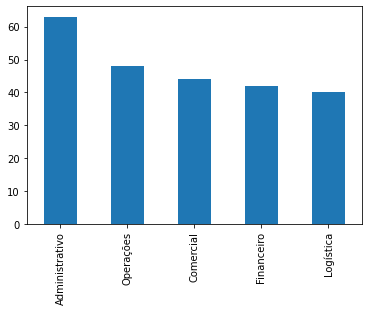

In [27]:
contratos_area_df = servicos_df.merge(funcionarios_df[['ID Funcionário','Area']], on='ID Funcionário')
display(contratos_area_df)
contratos_area_qtd = contratos_area_df['Area'].value_counts()
display(contratos_area_qtd)
contratos_area_qtd.plot(kind='bar')

### 5- Total de funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

<AxesSubplot:>

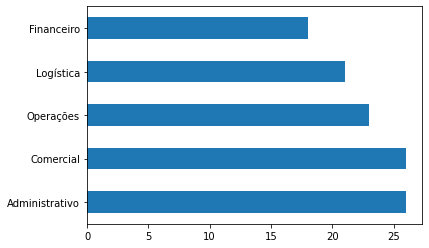

In [26]:
qtde_total_funcionarios_area = funcionarios_df['Area'].value_counts()
display(qtde_total_funcionarios_area)
qtde_total_funcionarios_area.plot(kind='barh')

### 6-  Ticket médio mensal

In [29]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('Ticket médio mensal R${:.2f}'.format(ticket_medio))

Ticket médio mensal R$2502.56
